In [1]:
%matplotlib inline

import pandas
import numpy
from sklearn import linear_model
import matplotlib.pyplot as plt
import useful_wrapper_functions
import seaborn
from data import get_data
seaborn.set(style='darkgrid')

In [2]:
data1 = get_data('ex2data1.txt')
data1.columns = ['exam1','exam2','admitted to uni']


# Normal logistic regression 


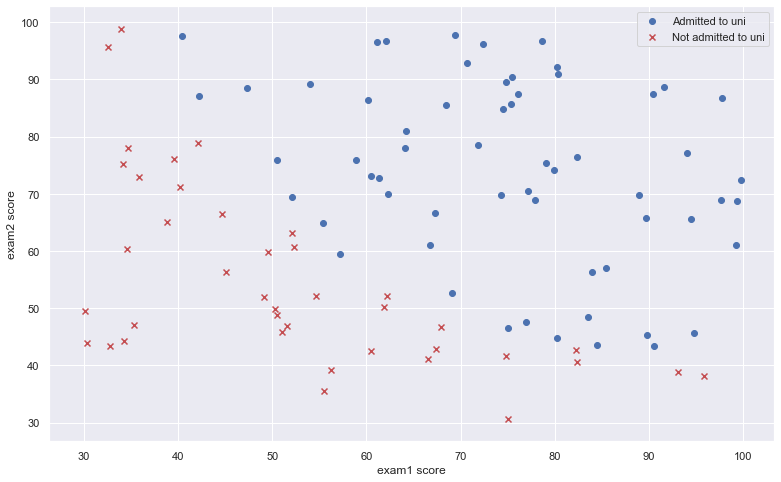

In [3]:
fig, ax = plt.subplots(figsize=(13,8))
ax.set_xlabel('exam1 score')
ax.set_ylabel('exam2 score')
ax.scatter(data1['exam1'][data1['admitted to uni']==1],data1['exam2'][data1['admitted to uni']==1],c='b')
ax.scatter(data1['exam1'][data1['admitted to uni']==0],data1['exam2'][data1['admitted to uni']==0],marker='x',c='r')
ax.legend(['Admitted to uni','Not admitted to uni'])

In [12]:
log_reg = linear_model.LinearRegression()
log_reg.fit(data1.loc[:,'exam1':'exam2'],data1['admitted to uni'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
log_reg.score(data1.loc[:,'exam1':'exam2'],data1['admitted to uni'])

0.6062752864712598

In [77]:
log_gdreg = linear_model.LogisticRegression(solver='liblinear')
log_gdreg.fit(data1.loc[:,'exam1':'exam2'],data1['admitted to uni'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
log_gdreg.score(data1.loc[:,'exam1':'exam2'],data1['admitted to uni'])

0.87

In [79]:
data1.loc[:,'prediction'] = log_gdreg.predict(data1.loc[:,'exam1':'exam2'])

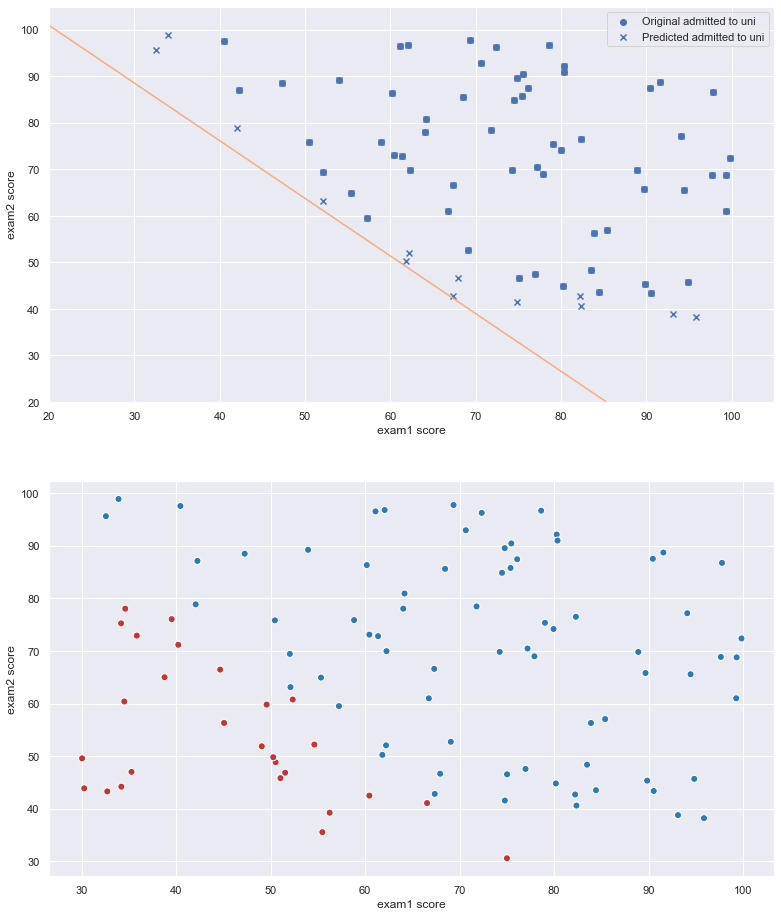

In [90]:
# plotting decision boundary
# arrays of (x ,y) corordinates on the chart
xx, yy = numpy.mgrid[20:110:5, 20:110:5]
grid = numpy.c_[xx.ravel(), yy.ravel()]
probs = log_gdreg.predict_proba(grid)[:, 1].reshape(xx.shape)

fig, (ax,ax2) = plt.subplots(2,1,figsize=(13,16))
ax.set_xlabel('exam1 score')
ax.set_ylabel('exam2 score')
# ax.set_title('original data')
ax2.set_xlabel('exam1 score')
ax2.set_ylabel('exam2 score')
# ax2.set_title('prediction')
ax.scatter(data1['exam1'][data1['admitted to uni']==1],data1['exam2'][data1['admitted to uni']==1], c='b')
ax.scatter(data1['exam1'][data1['prediction']==1],data1['exam2'][data1['prediction']==1], marker='x', c='b')
# ax.scatter(data1['exam1'][data1['admitted to uni']==0],data1['exam2'][data1['admitted to uni']==0], c='r')
# ax.scatter(data1['exam1'][data1['prediction']==0],data1['exam2'][data1['prediction']==0], marker='x', c='r')
ax.legend(['Original admitted to uni','Predicted admitted to uni', 'Original not admitted to uni', 'Predicted not admitted to uni'])
ax.contour(xx,yy,probs, levels=[.5], vmin=0, vmax=.6)

ax2.scatter(data1['exam1'],data1['exam2'],c=data1['prediction'],cmap='RdBu',vmin=-.2, vmax=1.2, edgecolor="white", linewidth=1,s=50)

# ax2.legend(['Admitted to uni','Not admitted to uni'])
# contour = ax2.contour(xx,yy,probs,990,cmap='BuGn',vmin=0,vmax=1)

# ax_c = fig.colorbar(contour)
# ax_c.set_label("$P(y = 1)$")
# ax_c.set_ticks([0, .25, .5, .75, 1])



# Rounded case logistics regression

In [91]:
data2 = get_data('ex2data2.txt')
data2.columns = ['Microchip test1','Microchip test2','QA']

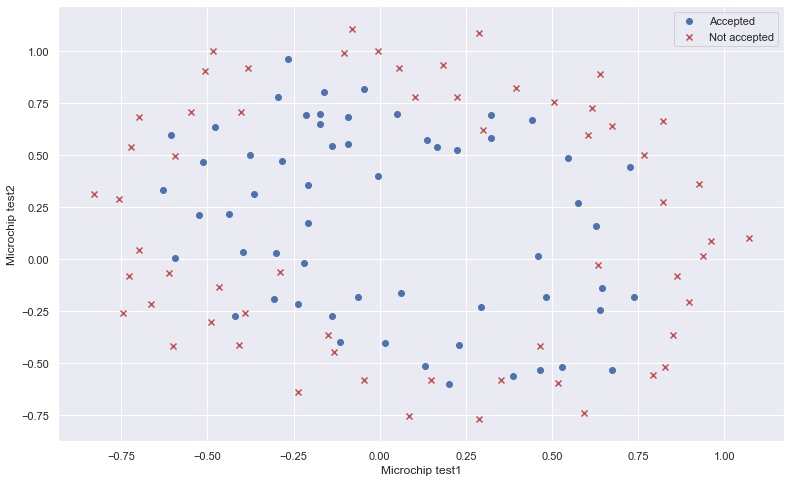

In [92]:
fig, ax = plt.subplots(figsize=(13,8))
ax.set_xlabel('Microchip test1')
ax.set_ylabel('Microchip test2')
ax.scatter(data2['Microchip test1'][data2['QA']==1],data2['Microchip test2'][data2['QA']==1],c='b')
ax.scatter(data2['Microchip test1'][data2['QA']==0],data2['Microchip test2'][data2['QA']==0],marker='x',c='r')
ax.legend(['Accepted','Not accepted'])

In [123]:
log_gdreg2 = linear_model.SGDClassifier(loss='log', alpha=0.6)
log_gdreg2.fit(data2.loc[:,'Microchip test1':'Microchip test2'],data2['QA'])

SGDClassifier(alpha=0.6, average=False, class_weight=None, early_stopping=False,
              epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
              learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [124]:
log_gdreg2.score(data2.loc[:,'Microchip test1':'Microchip test2'],data2['QA'])

0.5084745762711864